In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib


balita = pd.read_csv("Documents/Aretha/Semester3/AOL_AI/Stunting_Dataset_Bayi.csv")

#encode
balita['Gender'] = balita['Gender'].replace({'Male': 0, 'Female': 1})
balita['Breastfeeding'] = balita['Breastfeeding'].replace({'No': 0, 'Yes': 1})
balita['Stunting_Label'] = balita['Stunting'].replace({'No': 0, 'Yes': 1})

#label
X = balita[['Gender', 'Age', 'Birth Weight', 'Birth Length',
            'Body Weight', 'Body Length', 'Breastfeeding']]
y = balita['Stunting_Label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#normalisasi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/var/folders/v3/nyw6ps3j0yvg52l6fpz2_qnm0000gn/T/ipykernel_6350/3792734317.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  balita['Gender'] = balita['Gender'].replace({'Male': 0, 'Female': 1})
/var/folders/v3/nyw6ps3j0yvg52l6fpz2_qnm0000gn/T/ipykernel_6350/3792734317.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  balita['Breastfeeding'] = balita['Breastfeeding'].replace({'No': 0, 'Yes': 1})
/var/folders/v3/nyw6ps3j0yvg52l6fpz2_qnm0000gn/T/ipykernel_6350/3792734317.py:19: FutureWarning: Downcasting behavior in `replace` 

In [3]:
#decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

dt_train_acc = dt_model.score(X_train_scaled, y_train)
dt_val_acc = dt_model.score(X_test_scaled, y_test)

print("\n=== DECISION TREE ===")
print("Train Accuracy :", dt_train_acc)
print("Val Accuracy   :", dt_val_acc)

#random forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

rf_train_acc = rf_model.score(X_train_scaled, y_train)
rf_val_acc = rf_model.score(X_test_scaled, y_test)

print("\n=== RANDOM FOREST ===")
print("Train Accuracy :", rf_train_acc)
print("Val Accuracy   :", rf_val_acc)

print("\nClassification Report (DT):")
print(classification_report(y_test, dt_model.predict(X_test_scaled)))

print("\nClassification Report (RF):")
print(classification_report(y_test, rf_model.predict(X_test_scaled)))


=== DECISION TREE ===
Train Accuracy : 0.969375
Val Accuracy   : 0.8095833333333333

=== RANDOM FOREST ===
Train Accuracy : 0.969375
Val Accuracy   : 0.865

Classification Report (DT):
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       809
           1       0.87      0.83      0.85      1591

    accuracy                           0.81      2400
   macro avg       0.79      0.80      0.79      2400
weighted avg       0.81      0.81      0.81      2400


Classification Report (RF):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       809
           1       0.89      0.92      0.90      1591

    accuracy                           0.86      2400
   macro avg       0.85      0.84      0.85      2400
weighted avg       0.86      0.86      0.86      2400



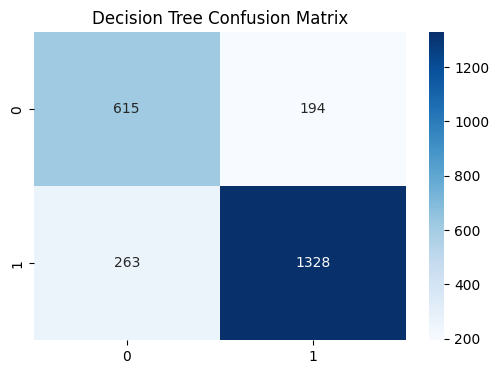

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt_model.predict(X_test_scaled)),
            annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()

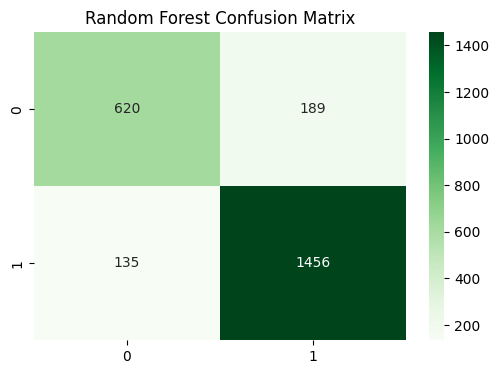

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test_scaled)),
            annot=True, cmap="Greens", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

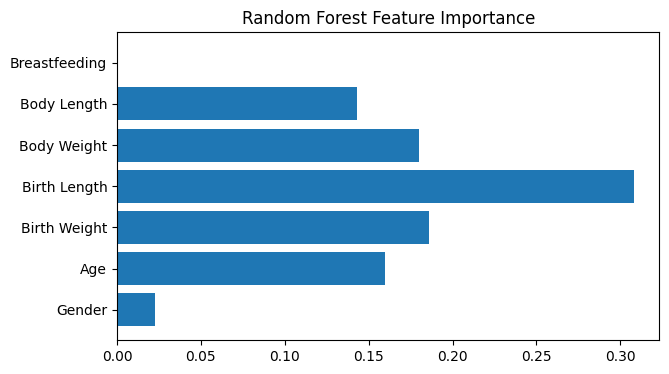

In [6]:
plt.figure(figsize=(7,4))
plt.barh(X.columns, rf_model.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

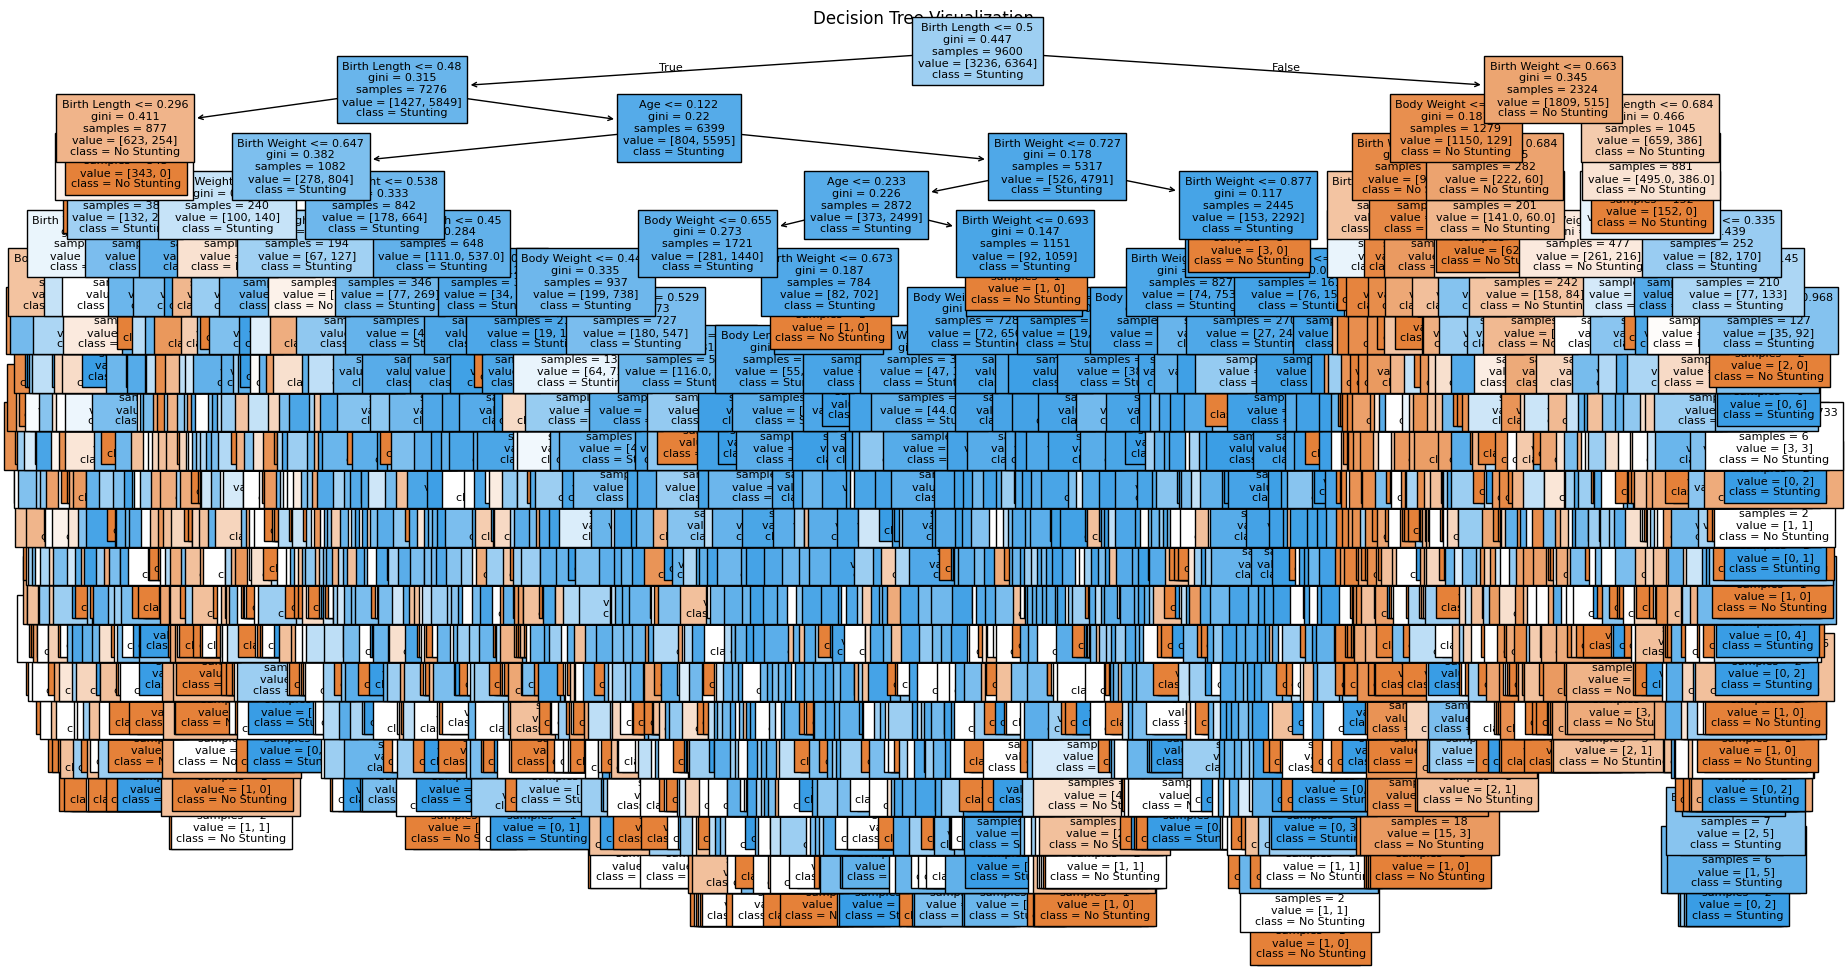

In [7]:
plt.figure(figsize=(22,12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Stunting", "Stunting"],
    filled=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()

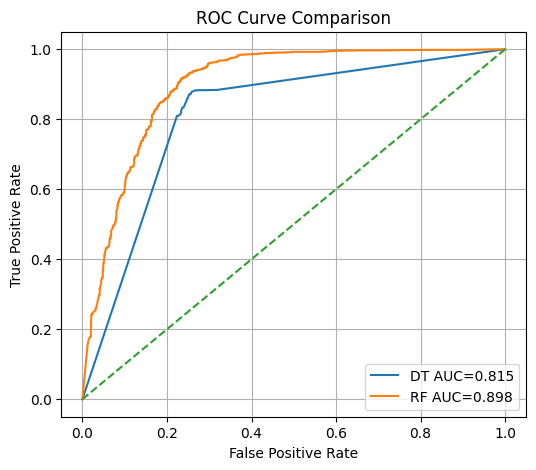

In [8]:
dt_prob = dt_model.predict_proba(X_test_scaled)[:,1]
rf_prob = rf_model.predict_proba(X_test_scaled)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f"DT AUC={auc(fpr_dt,tpr_dt):.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC={auc(fpr_rf,tpr_rf):.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

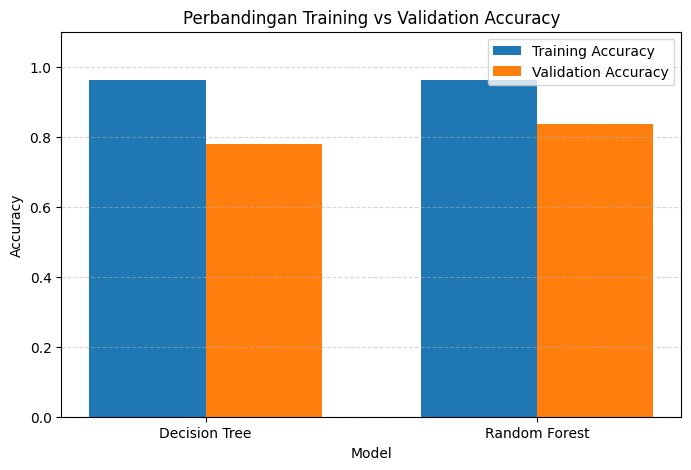

In [91]:
# Nama model
models = ['Decision Tree', 'Random Forest']

# Training accuracy
train_acc = [dt_train_acc, rf_train_acc]

# Validation accuracy
val_acc = [dt_val_acc, rf_val_acc]

# posisi bar
x = np.arange(len(models))
width = 0.35  # lebar bar

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Perbandingan Training vs Validation Accuracy")
plt.ylim(0, 1.1)
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [9]:
joblib.dump(dt_model, "bayi_decision_tree.pkl")
joblib.dump(rf_model, "bayi_random_forest.pkl", compress=("xz", 9))
joblib.dump(scaler, "bayi_scaler.pkl")

print("\n✅ Model Bayi berhasil disimpan!")


✅ Model Bayi berhasil disimpan!
